<a href="https://colab.research.google.com/github/koroglubeyaz/ML-DeepLearning/blob/main/hw2_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
import sys
sys.path.insert(0, 'drive/hw')

In [4]:
!pip install torch torchvision
import torch

In [5]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import seaborn as sns
import pandas as pd

# Hyper Parameters
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST Dataset 
train_dataset = dsets.MNIST(root ='./data',
							train = True,
							transform = transforms.ToTensor(),
							download = True)

test_dataset = dsets.MNIST(root ='./data',
						train = False,
						transform = transforms.ToTensor())

# Dataset Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
										batch_size = batch_size,
										shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
										batch_size = batch_size,
										shuffle = False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
# Model
class LogisticRegression(nn.Module):
	def __init__(self, input_size, num_classes):
		super(LogisticRegression, self).__init__()
		self.linear = nn.Linear(input_size, num_classes)

	def forward(self, x):
		out = self.linear(x)
		return out


model = LogisticRegression(input_size, num_classes)

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.

criterion = nn.CrossEntropyLoss()

#### SGD

In [8]:
# with SGD
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [9]:
# Training the Model
for epoch in range(num_epochs):
	
	for i, (images, labels) in enumerate(train_loader):
		images = Variable(images.view(-1, 28 * 28))
		labels = Variable(labels)

		# Forward + Backward + Optimize
		optimizer.zero_grad()
		outputs = model(images)
		loss = criterion(outputs, labels)
		loss.backward()
		optimizer.step()
		#accuracy = 100 * correct.item() / labels.size(0)

		if (i + 1) % 100 == 0: 
			print('Epoch: [% d/% d],  Loss: %.4f' % (epoch + 1, num_epochs, loss.item() ))

Epoch: [ 1/ 5],  Loss: 2.1954
Epoch: [ 1/ 5],  Loss: 2.1016
Epoch: [ 1/ 5],  Loss: 1.9959
Epoch: [ 1/ 5],  Loss: 1.9438
Epoch: [ 1/ 5],  Loss: 1.8425
Epoch: [ 1/ 5],  Loss: 1.7393
Epoch: [ 2/ 5],  Loss: 1.7129
Epoch: [ 2/ 5],  Loss: 1.6760
Epoch: [ 2/ 5],  Loss: 1.5164
Epoch: [ 2/ 5],  Loss: 1.5410
Epoch: [ 2/ 5],  Loss: 1.5139
Epoch: [ 2/ 5],  Loss: 1.5087
Epoch: [ 3/ 5],  Loss: 1.4384
Epoch: [ 3/ 5],  Loss: 1.4028
Epoch: [ 3/ 5],  Loss: 1.3174
Epoch: [ 3/ 5],  Loss: 1.2581
Epoch: [ 3/ 5],  Loss: 1.2586
Epoch: [ 3/ 5],  Loss: 1.1981
Epoch: [ 4/ 5],  Loss: 1.1627
Epoch: [ 4/ 5],  Loss: 1.1655
Epoch: [ 4/ 5],  Loss: 1.1042
Epoch: [ 4/ 5],  Loss: 1.1366
Epoch: [ 4/ 5],  Loss: 1.1060
Epoch: [ 4/ 5],  Loss: 1.0774
Epoch: [ 5/ 5],  Loss: 1.1214
Epoch: [ 5/ 5],  Loss: 1.0635
Epoch: [ 5/ 5],  Loss: 1.0016
Epoch: [ 5/ 5],  Loss: 0.9751
Epoch: [ 5/ 5],  Loss: 0.9600
Epoch: [ 5/ 5],  Loss: 1.0706


In [11]:
# Test the Model
correct = 0
total = 0

mpred=[]
mlabel=[]

for images, labels in test_loader:
	images = Variable(images.view(-1, 28 * 28))
	outputs = model(images)
	_, predicted = torch.max(outputs.data, 1)
	mlabel.append(labels.numpy())
	mpred.append(predicted.numpy())
	total += labels.size(0)
	correct += (predicted == labels).sum()

In [12]:
print('Accuracy of the model on 10000 test datas : %.2f %%' % (100 * correct / total))

Accuracy of the model on 10000 test datas : 83.03 %


-------------------------------------------------------
----------------Confusion Matrix-----------------------
-------------------------------------------------------


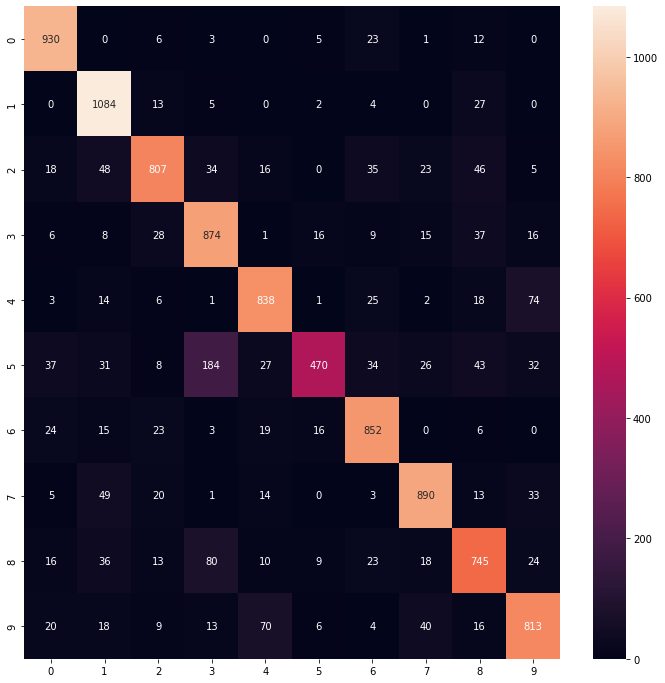

In [14]:
print("-------------------------------------------------------")
print("----------------Confusion Matrix-----------------------")
print("-------------------------------------------------------")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

array = confusion_matrix(np.asarray(mlabel).flatten(),np.asarray(mpred).flatten())
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plt.figure(figsize = (12, 12))
sns.heatmap(df_cm, annot = True,fmt='g')

### ADAM

In [15]:
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
# Training the Model
for epoch in range(num_epochs):
	
	for i, (images, labels) in enumerate(train_loader):
		images = Variable(images.view(-1, 28 * 28))
		labels = Variable(labels)

		# Forward + Backward + Optimize
		optimizer.zero_grad()
		outputs = model(images)
		loss = criterion(outputs, labels)
		loss.backward()
		optimizer.step()
		#accuracy = 100 * correct.item() / labels.size(0)

		if (i + 1) % 100 == 0: 
			print('Epoch: [% d/% d],  Loss: %.4f' % (epoch + 1, num_epochs, loss.item() ))

Epoch: [ 1/ 5],  Loss: 0.5324
Epoch: [ 1/ 5],  Loss: 0.4325
Epoch: [ 1/ 5],  Loss: 0.4155
Epoch: [ 1/ 5],  Loss: 0.4127
Epoch: [ 1/ 5],  Loss: 0.2606
Epoch: [ 1/ 5],  Loss: 0.4111
Epoch: [ 2/ 5],  Loss: 0.3104
Epoch: [ 2/ 5],  Loss: 0.4346
Epoch: [ 2/ 5],  Loss: 0.4485
Epoch: [ 2/ 5],  Loss: 0.2328
Epoch: [ 2/ 5],  Loss: 0.3845
Epoch: [ 2/ 5],  Loss: 0.2946
Epoch: [ 3/ 5],  Loss: 0.2606
Epoch: [ 3/ 5],  Loss: 0.2966
Epoch: [ 3/ 5],  Loss: 0.1633
Epoch: [ 3/ 5],  Loss: 0.2993
Epoch: [ 3/ 5],  Loss: 0.2871
Epoch: [ 3/ 5],  Loss: 0.3783
Epoch: [ 4/ 5],  Loss: 0.3073
Epoch: [ 4/ 5],  Loss: 0.4017
Epoch: [ 4/ 5],  Loss: 0.2249
Epoch: [ 4/ 5],  Loss: 0.2034
Epoch: [ 4/ 5],  Loss: 0.2086
Epoch: [ 4/ 5],  Loss: 0.2669
Epoch: [ 5/ 5],  Loss: 0.2643
Epoch: [ 5/ 5],  Loss: 0.2780
Epoch: [ 5/ 5],  Loss: 0.1841
Epoch: [ 5/ 5],  Loss: 0.2262
Epoch: [ 5/ 5],  Loss: 0.3018
Epoch: [ 5/ 5],  Loss: 0.4837


In [17]:
# Test the Model
correct = 0
total = 0

mpred=[]
mlabel=[]

for images, labels in test_loader:
	images = Variable(images.view(-1, 28 * 28))
	outputs = model(images)
	_, predicted = torch.max(outputs.data, 1)
	mlabel.append(labels.numpy())
	mpred.append(predicted.numpy())
	total += labels.size(0)
	correct += (predicted == labels).sum()

In [18]:
print('Accuracy of the model on 10000 test datas : %.2f %%' % (100 * correct / total))

Accuracy of the model on 10000 test datas : 92.28 %


-------------------------------------------------------
----------------Confusion Matrix-----------------------
-------------------------------------------------------


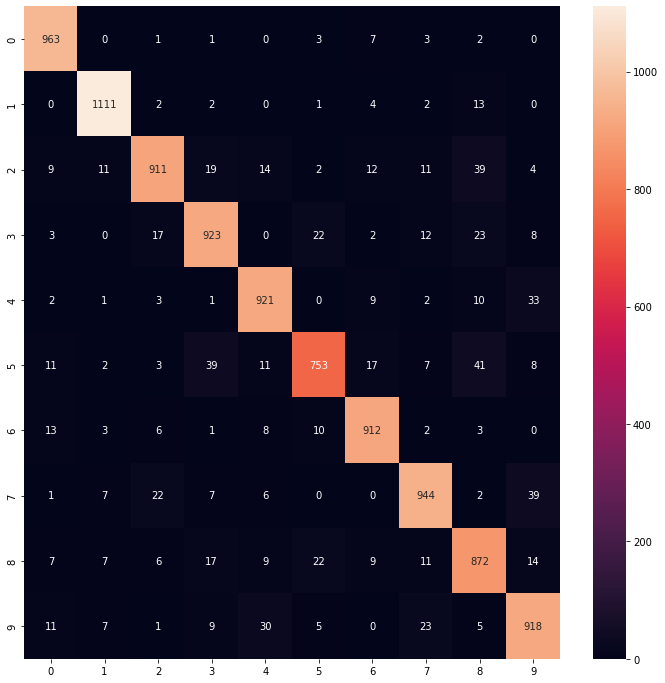

In [19]:
print("-------------------------------------------------------")
print("----------------Confusion Matrix-----------------------")
print("-------------------------------------------------------")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

array = confusion_matrix(np.asarray(mlabel).flatten(),np.asarray(mpred).flatten())
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plt.figure(figsize = (12, 12))
sns.heatmap(df_cm, annot = True,fmt='g')

### NESTEROV

In [35]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum=0.9, nesterov=True)

In [36]:
# Training the Model
for epoch in range(num_epochs):
	
	for i, (images, labels) in enumerate(train_loader):
		images = Variable(images.view(-1, 28 * 28))
		labels = Variable(labels)

		# Forward + Backward + Optimize
		optimizer.zero_grad()
		outputs = model(images)
		loss = criterion(outputs, labels)
		loss.backward()
		optimizer.step()
		#accuracy = 100 * correct.item() / labels.size(0)

		if (i + 1) % 100 == 0: 
			print('Epoch: [% d/% d],  Loss: %.4f' % (epoch + 1, num_epochs, loss.item() ))

Epoch: [ 1/ 5],  Loss: 0.5094
Epoch: [ 1/ 5],  Loss: 0.2626
Epoch: [ 1/ 5],  Loss: 0.1420
Epoch: [ 1/ 5],  Loss: 0.2863
Epoch: [ 1/ 5],  Loss: 0.1221
Epoch: [ 1/ 5],  Loss: 0.1692
Epoch: [ 2/ 5],  Loss: 0.2316
Epoch: [ 2/ 5],  Loss: 0.2659
Epoch: [ 2/ 5],  Loss: 0.2510
Epoch: [ 2/ 5],  Loss: 0.2478
Epoch: [ 2/ 5],  Loss: 0.2000
Epoch: [ 2/ 5],  Loss: 0.1145
Epoch: [ 3/ 5],  Loss: 0.1434
Epoch: [ 3/ 5],  Loss: 0.3474
Epoch: [ 3/ 5],  Loss: 0.4226
Epoch: [ 3/ 5],  Loss: 0.2527
Epoch: [ 3/ 5],  Loss: 0.2241
Epoch: [ 3/ 5],  Loss: 0.2829
Epoch: [ 4/ 5],  Loss: 0.1515
Epoch: [ 4/ 5],  Loss: 0.3175
Epoch: [ 4/ 5],  Loss: 0.2970
Epoch: [ 4/ 5],  Loss: 0.3107
Epoch: [ 4/ 5],  Loss: 0.2629
Epoch: [ 4/ 5],  Loss: 0.3075
Epoch: [ 5/ 5],  Loss: 0.2513
Epoch: [ 5/ 5],  Loss: 0.3088
Epoch: [ 5/ 5],  Loss: 0.2904
Epoch: [ 5/ 5],  Loss: 0.2643
Epoch: [ 5/ 5],  Loss: 0.5465
Epoch: [ 5/ 5],  Loss: 0.1525


In [37]:
# Test the Model
correct = 0
total = 0

mpred=[]
mlabel=[]

for images, labels in test_loader:
	images = Variable(images.view(-1, 28 * 28))
	outputs = model(images)
	_, predicted = torch.max(outputs.data, 1)
	mlabel.append(labels.numpy())
	mpred.append(predicted.numpy())
	total += labels.size(0)
	correct += (predicted == labels).sum()

In [38]:
print('Accuracy of the model on 10000 test datas : %.2f %%' % (100 * correct / total))

Accuracy of the model on 10000 test datas : 92.42 %


-------------------------------------------------------
----------------Confusion Matrix-----------------------
-------------------------------------------------------


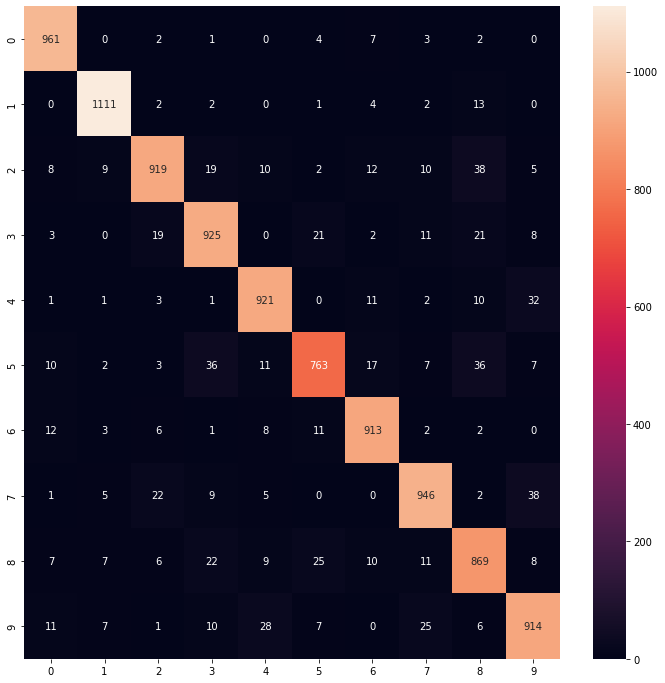

In [39]:
print("-------------------------------------------------------")
print("----------------Confusion Matrix-----------------------")
print("-------------------------------------------------------")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

array = confusion_matrix(np.asarray(mlabel).flatten(),np.asarray(mpred).flatten())
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plt.figure(figsize = (12, 12))
sns.heatmap(df_cm, annot = True,fmt='g')